# <div style="text-align: center"> **Corso di Probabilità e Statistica** </div> 
### <div style="text-align: center"> Esame 28-01-2021 </div> 
***
## <div style="text-align: right"> Edoardo Tronconi </div> <div style="text-align: right"> n. matricola: 975734 </div>
***

# Librerie necessarie

In [813]:
import numpy as np # operazioni su vettori
import pandas as pd # data analysis
import matplotlib.pyplot as plt # grafici
import seaborn as sns # grafici
import scipy.stats as st #funzioni statistiche

# Impostazioni grafiche

In [2]:
pd.set_option('display.max_columns', None) # mostra tutte le colonne di un dataframe

In [548]:
params = {
    'figure.figsize' : [18,12],
    'font.size' : 18,
}

plt.rcParams.update(params)

# Importo i dati

Uso come `MultiIndex` le Regioni, le Province e i Comuni

Rimuovo le colonne `incremento %` poichè non sono significative quando si raggruppano i dati per regione o provincia tramite `df.groupby`: la media degli incrementi percentuali non corrisponde all'incremento per provincia (o regione) in quanto i comuni hanno diverso numero di decessi tra loro. 

Ottengo per ogni foglio del documento excel un dataframe e poi li unisco tutti in un unico DataFrame `DATA`

In [1373]:
df_decessi_mesi = pd.read_excel('./Tavola riepilogativa_30GIUGNO_7.357COMUNI.xlsx', sheet_name = 'Totale per mese', header = [0,1], index_col=[0,1]).replace('-', np.nan)
df_decessi_mesi.index.names = ['REG', 'PROV']
df_decessi_mesi.columns.names = [None,None]
df_decessi_mesi.drop(columns=[('COD_PROVCOM')], level=1, inplace=True)

#creo un dataframe contenente solo i nomi delle regioni
df_nomi_RegProvCom = df_decessi_mesi[['totale decessi']].rename(columns={'totale decessi': None})

#Rinomino le colonne con i nomi dei mesi
df_decessi_mesi.rename(columns={
                                '01/01 - 31/01' : 'Gen',
                                '01/02 - 29/02' : 'Feb',
                                '01/03 -31/03' : 'Mar',
                                '01/04 -30/04' : 'Apr',
                                '01/05 -31/05' : 'Mag',
                                '01/06 -30/06' : 'Giu',
                                },
                        level=1, inplace=True)

#rinomino la colonna 2020 in modo che il nome sia una stringa anzichè un int, per coerenza con gli altri label
df_decessi_mesi.rename(columns={
                                2020 : '2020'
                                },
                        level=0, inplace=True)

#rimuovo colonne non utili
df_decessi_mesi.drop(columns=['incremento %', 'totale decessi'], level=0, inplace=True)

df_decessi_sesso = pd.read_excel('./Tavola riepilogativa_30GIUGNO_7.357COMUNI.xlsx', sheet_name = 'Totale per sesso', header = [0,1], index_col=[0,1]).replace('-', np.nan)
df_decessi_sesso.index.names = ['REG', 'PROV']
df_decessi_sesso.columns.names = [None,None]

df_decessi_sesso.drop(columns=[('COD_PROVCOM')], level=1, inplace=True)
df_decessi_sesso.drop(columns=['incremento %','totale decessi'], level=0, inplace=True)

df_decessi_sesso.rename(columns={
                                '1 MARZO - 30 GIUGNO MEDIA 2015-2019' : 'MEDIA 2015-2019',
                                '1 MARZO - 30 GIUGNO 2020' : '2020',
                                },
                        level=0, inplace=True)

df_decessi_over65 = pd.read_excel('./Tavola riepilogativa_30GIUGNO_7.357COMUNI.xlsx', sheet_name = 'Età65+ Totale', header = [0,1], index_col=[0,1]).replace('-', np.nan)
df_decessi_over65.index.names = ['REG', 'PROV']
df_decessi_over65.columns.names = [None,None]

df_decessi_over65.drop(columns=[('COD_PROVCOM')], level=1, inplace=True)
df_decessi_over65.drop(columns=['incremento %','totale decessi'], level=0, inplace=True)

df_decessi_over65.rename(columns={
                                '1 MARZO - 30 GIUGNO MEDIA 2015-2019' : 'MEDIA 2015-2019',
                                '1 MARZO - 30 GIUGNO 2020' : '2020',
                                },
                        level=0, inplace=True)

df_decessi_over65M = pd.read_excel('./Tavola riepilogativa_30GIUGNO_7.357COMUNI.xlsx', sheet_name = 'Età65+ Maschi', header = [0,1], index_col=[0,1]).replace('-', np.nan)
df_decessi_over65M.index.names = ['REG', 'PROV']
df_decessi_over65M.columns.names = [None,None]

df_decessi_over65M.drop(columns=[('COD_PROVCOM')], level=1, inplace=True)
df_decessi_over65M.drop(columns=['incremento %','totale decessi'], level=0, inplace=True)

df_decessi_over65M.rename(columns={
                                '1 MARZO - 30 GIUGNO MEDIA 2015-2019' : 'MEDIA 2015-2019',
                                '1 MARZO - 30 GIUGNO 2020' : '2020',
                                },
                        level=0, inplace=True)

df_decessi_over65F = pd.read_excel('./Tavola riepilogativa_30GIUGNO_7.357COMUNI.xlsx', sheet_name = 'Età65+ Femmine', header = [0,1], index_col=[0,1]).replace('-', np.nan)
df_decessi_over65F.index.names = ['REG', 'PROV']
df_decessi_over65F.columns.names = [None,None]

df_decessi_over65F.drop(columns=[('COD_PROVCOM')], level=1, inplace=True)
df_decessi_over65F.drop(columns=['incremento %','totale decessi'], level=0, inplace=True)

df_decessi_over65F.rename(columns={
                                '1 MARZO - 30 GIUGNO MEDIA 2015-2019' : 'MEDIA 2015-2019',
                                '1 MARZO - 30 GIUGNO 2020' : '2020',
                                },
                        level=0, inplace=True)

In [1374]:
DATA_RAW = pd.concat([df_nomi_RegProvCom, df_decessi_mesi, df_decessi_sesso, df_decessi_over65, df_decessi_over65M, df_decessi_over65F],keys=['NOMI', 'MESI','TOTALI (Mar-Giu)','OVER 65 (Mar-Giu)','OVER 65 (Mar-Giu) M','OVER 65 (Mar-Giu) F'], axis=1)
DATA_RAW = DATA_RAW.reset_index().set_index([('NOMI',None,'NOME_REGIONE'),('NOMI',None,'NOME_PROVINCIA'),('NOMI',None,'NOME_COMUNE')]).drop(columns=['REG','PROV'], level=0)

DATA_RAW.index.names = ['REGIONE', 'PROVINCIA','COMUNE']
DATA_RAW.columns.names = ['FOGLIO EXCEL', 'ANNI',None]
DATA_RAW.sort_index(inplace=True)

DATA_RAW = round(DATA_RAW,1)
DATA_RAW

FOGLIO EXCEL                            MESI                               \
ANNI                         MEDIA 2015-2019                                
                                         Gen   Feb   Mar   Apr   Mag  Giu   
REGIONE PROVINCIA COMUNE                                                    
Abruzzo Chieti    Altino                 3.4   2.2   2.6   2.8   1.2  3.0   
                  Archi                  4.4   2.0   3.2   3.8   2.0  2.8   
                  Arielli                1.2   0.4   1.0   1.0   1.2  1.6   
                  Atessa                13.4  10.0  12.0  11.8  11.0  8.4   
                  Bomba                  0.8   1.8   1.4   1.0   0.4  0.8   
...                                      ...   ...   ...   ...   ...  ...   
Veneto  Vicenza   Villaverla             5.4   3.4   2.4   4.2   4.0  3.2   
                  Zanè                   5.6   5.8   3.0   3.0   3.2  3.4   
                  Zermeghedo             1.6   0.8   0.2   0.8   0.6  1.0   
                  Zovencedo              1.4   0.4   1.2   0.8   0.2  0.6   
                  Zugliano               3.2   4.4   3.6   3.0   3.8  2.2   

FOGLIO EXCEL                                          TOTALI (Mar-Giu)        \
ANNI                         2020                      MEDIA 2015-2019         
                              Gen Feb Mar Apr Mag Giu                M     F   
REGIONE PROVINCIA COMUNE                                                       
Abruzzo Chieti    Altino        3   0   5   1   5   3              4.8   4.8   
                  Archi         4   7   3   1   5   1              5.8   6.0   
                  Arielli       2   2   1   2   1   1              2.0   2.8   
                  Atessa       12  11  14  11  11  13             22.2  21.0   
                  Bomba         2   2   1   0   1   0              1.8   1.8   
...                           ...  ..  ..  ..  ..  ..              ...   ...   
Veneto  Vicenza   Villaverla    5   6   6   5   7   2              7.6   6.2   
                  Zanè          6   5   6   8   3   4              7.4   5.2   
                  Zermeghedo    0   0   1   1   2   0              1.4   1.2   
                  Zovencedo     1   1   0   1   2   1              1.8   1.0   
                  Zugliano      6   6  10   2   5   2              5.6   7.0   

FOGLIO EXCEL                                    OVER 65 (Mar-Giu)        \
ANNI                               2020           MEDIA 2015-2019         
                               M+F    M   F M+F             65-74 75-84   
REGIONE PROVINCIA COMUNE                                                  
Abruzzo Chieti    Altino       9.6    8   6  14               1.2   1.8   
                  Archi       11.8    3   7  10               1.4   3.2   
                  Arielli      4.8    3   2   5               0.0   1.8   
                  Atessa      43.2   25  24  49               6.0  13.8   
                  Bomba        3.6    0   2   2               0.2   1.8   
...                            ...  ...  ..  ..               ...   ...   
Veneto  Vicenza   Villaverla  13.8   10  10  20               1.8   5.0   
                  Zanè        12.6   12   9  21               1.8   4.0   
                  Zermeghedo   2.6    1   3   4               0.4   0.8   
                  Zovencedo    2.8    3   1   4               0.0   1.2   
                  Zugliano    12.6   13   6  19               1.8   4.0   

FOGLIO EXCEL                                           OVER 65 (Mar-Giu) M  \
ANNI                                 2020                  MEDIA 2015-2019   
                             85 e + 65-74 75-84 85 e +               65-74   
REGIONE PROVINCIA COMUNE                                                     
Abruzzo Chieti    Altino        5.4     3     5      5                 1.0   
                  Archi         6.2     1     2      7                 0.8   
                  Arielli       2.8     0     3  

***
## Importo i dati della popolazione dei singoli comuni
Scaricati dal sito [ISTAT](http://dati.istat.it/Index.aspx?QueryId=18981#)

In [1877]:
df_pop_raw = pd.read_excel('./popolazione_comuni.xls', index_col=0, header=1)

I dati sono organizzati in modo diverso rispetto al dataset dei decessi: le label delle righe non hanno più colonne diverse per Regione, Provincia e Comune, ma sono disposte secondo

`Italia
  Regione 1
    Provincia 1
      Comune 1
      Comune 2
      .
      .
    Provincia 2
    .
    .
  Regione 2
    Provincia 1
    .
    .
  .
  .
`

Inoltre il numero di comuni è superiore: alcuni comuni sono presenti nel censimento della popolazione, ma non nel dataset dei decessi

In [1878]:
df_pop_raw

,maschi,femmine,totale
Territorio,,,
Italia,29131195,30685478,59816673
Piemonte,2103024,2225541,4328565
Torino,1083154,1155509,2238663
Agliè,1243,1391,2634
Airasca,1836,1777,3613
...,...,...,...
Villaputzu,2298,2363,4661
Villasalto,505,515,1020
Villasimius,1878,1836,3714


### Allineamento delle etichette dei comuni
Creo un pd.MultiIndex strutturato come quello del dataset dei decessi $\rightarrow $ (REGIONE, PROVINCIA, COMUNE)

In [1879]:
regioneNow = ''
provinciaNow = ''
comuneNow = ''
INDEX = []
TO_DROP = [0]
for i,idx in enumerate(df_pop_raw.index):
    # Sfrutto il fatto che le etichette hanno un diverso numero di spazi prima del nome a seconda del livello a cui si riferiscono
    
    #Nome di comune
    if idx[0:6].isspace():
        comuneNow = idx[6:]
        # I comuni della provincia di bolzano hanno anche il nome tedesco separato da un '/', assente nel dataset dei decessi
        if idx.find('/')!=-1:
            comuneNow = idx[6:idx.find('/')]
        INDEX.append((regioneNow, provinciaNow, comuneNow))
    
    #nome di provincia
    elif idx[0:4].isspace():
        provinciaNow = idx[4:]
        TO_DROP.append(i) #le righe contenenti il totale per regioni o province saranno da eliminare
    
    #nome di regione
    elif idx[0:2].isspace():
        regioneNow = idx[2:]
        TO_DROP.append(i)

newIndex = pd.MultiIndex.from_tuples(INDEX)
newIndex

MultiIndex([('Piemonte',       'Torino',           'Agliè'),
            ('Piemonte',       'Torino',         'Airasca'),
            ('Piemonte',       'Torino',    'Ala di Stura'),
            ('Piemonte',       'Torino', 'Albiano d'Ivrea'),
            ('Piemonte',       'Torino', 'Alice Superiore'),
            ('Piemonte',       'Torino',          'Almese'),
            ('Piemonte',       'Torino',         'Alpette'),
            ('Piemonte',       'Torino',       'Alpignano'),
            ('Piemonte',       'Torino',        'Andezeno'),
            ('Piemonte',       'Torino',         'Andrate'),
            ...
            ('Sardegna', 'Sud Sardegna',  'Villamassargia'),
            ('Sardegna', 'Sud Sardegna',  'Villanova Tulo'),
            ('Sardegna', 'Sud Sardegna',  'Villanovaforru'),
            ('Sardegna', 'Sud Sardegna', 'Villanovafranca'),
            ('Sardegna', 'Sud Sardegna',   'Villaperuccio'),
            ('Sardegna', 'Sud Sardegna',      'Villaputzu'),
        

In [1885]:
# elimino le righe corrispondenti ai totali Regione/Provincia
df_pop = df_pop_raw.reset_index().drop(TO_DROP).set_index('Territorio')

#Modifico l'indice inserendo quello nuovo
df_pop.index = newIndex

#Elimino righe con comuni senza dati (comuni in province non più esistenti)
df_pop = df_pop.sort_index().replace('..',np.nan).dropna()

#Alcune regioni, province e comuni hanno nomi diversi nel dataset dei decessi e nel dataset della popolazione (grazie ISTAT)
df_pop.rename({
    "Valle d'Aosta / Vallée d'Aoste" : "Valle d'Aosta/Vallée d'Aoste", 
    "Provincia Autonoma Bolzano / Bozen" : "Trentino-Alto Adige/Südtirol", 
    "Provincia Autonoma Trento" : "Trentino-Alto Adige/Südtirol",
    }, inplace=True, level=0)
df_pop.rename({
    "Valle d'Aosta / Vallée d'Aoste" : "Valle d'Aosta/Vallée d'Aoste",
    "Bolzano / Bozen" : "Bolzano/Bozen", 
    "Reggio di Calabria" : "Reggio Calabria"
    }, inplace=True, level=1)
df_pop.rename({
    "Doberdò del Lago-Doberdob" : "Doberdò del Lago",
    "San Floriano del Collio-_teverjan" : "San Floriano del Collio",
    "Savogna d'Isonzo-Sovodnje ob Soci" : "Savogna d'Isonzo",
    "Duino Aurisina-Devin Nabre_ina" : "Duino Aurisina",
    "Monrupino-Repentabor" : "Monrupino",
    "San Dorligo della Valle-Dolina" : "San Dorligo della Valle",
    "Sgonico-Zgonik" : "Sgonico",
    "San Giovanni di Fassa-Sèn Jan" : "San Giovanni di Fassa"
    }, inplace=True, level=2)

# Nel 2020 sono stati creati 2 nuovi comuni dall'accorpamento di altri
df_pop.loc[('Trentino-Alto Adige/Südtirol', 'Trento', 'Novella'),:] = df_pop.loc[('Trentino-Alto Adige/Südtirol', 'Trento',['Brez', 'Cagnò', 'Cloz', 'Revò', 'Romallo']),:].sum()
df_pop.loc[('Trentino-Alto Adige/Südtirol', 'Trento', 'Ville di Fiemme'),:] = df_pop.loc[('Trentino-Alto Adige/Südtirol', 'Trento',['Carano', 'Daiano', 'Varena']),:].sum();

In [1886]:
# Tutti i comuni nel dataset dei decessi sono presenti anche in quello della popolazione
for I in DATA_RAW.index:
    if not(I in  df_pop.index):
        raise KeyError(str(I)+' non è presente')

In [1887]:
POP_COMUNI = df_pop.loc[DATA_RAW.index,:]

***
# Analisi

Aggiungo colonne con totali e UNDER 65

In [1888]:
#Aggiungo colonne per il totale dei decessi nei mesi da gennaio a giugno, e negli OVER65 e UNDER65
def calcola_totali(df):
    dfOut = df.copy()
    for FOGLIO in df.columns.get_level_values(0).unique():
        for ANNI in df.loc[:,(FOGLIO,slice(None))].columns.get_level_values(1).unique():
            dfOut.loc[:,(FOGLIO,ANNI,'totale')] = df.loc[:,(FOGLIO,ANNI,slice(None))].sum(axis=1)
    dfOut = dfOut.loc[:,(slice(None), slice(None),'totale')]
    return dfOut

DATA = DATA_RAW.drop(columns=['M+F'], level=2).join(calcola_totali(DATA_RAW.drop(columns=['M+F'], level=2))).sort_index(axis=1, level=[0,1], sort_remaining=False)

#Aggiungo colonne per i decessi UNDER 65
for sesso in ['M','F']:
    for anni in DATA.loc[:,('OVER 65 (Mar-Giu)', slice(None))].columns.get_level_values(1):
        DATA.loc[:,('UNDER 65 (Mar-Giu)', anni, 'totale '+sesso)] = round(DATA.loc[:,('TOTALI (Mar-Giu)', anni, sesso)],1) - round(DATA.loc[:,('OVER 65 (Mar-Giu) '+sesso, anni, 'totale')],1)
        
for anni in DATA.loc[:,('OVER 65 (Mar-Giu)', slice(None))].columns.get_level_values(1):
        DATA.loc[:,('UNDER 65 (Mar-Giu)', anni, 'totale')] = DATA.loc[:,('UNDER 65 (Mar-Giu)', anni, 'totale M')] + DATA.loc[:,('UNDER 65 (Mar-Giu)', anni, 'totale F')]

#Aggiungo colonna con la zona geografica
def zona(regione):
    if regione in ['Piemonte', "Valle d'Aosta/Vallée d'Aoste", 'Liguria', 'Lombardia']:
        return 'Nord-Ovest'
    elif regione in ['Trentino-Alto Adige/Südtirol', 'Veneto', 'Friuli-Venezia Giulia', 'Emilia-Romagna']:
        return 'Nord-Est'
    elif regione in ['Toscana', 'Umbria', 'Marche', 'Lazio']:
        return 'Centro'
    elif regione in ['Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata', 'Calabria']:
        return 'Sud'
    elif regione in ['Sicilia','Sardegna']:
        return 'Isole'
    else:
        raise ValueError('Regione deve essere tra "Abruzzo", "Basilicata", "Calabria", "Campania", "Emilia-Romagna", "Friuli-Venezia Giulia", "Lazio", "Liguria", "Lombardia", "Marche", "Molise", "Piemonte", "Puglia", "Sardegna", "Sicilia", "Toscana", "Trentino-Alto Adige/Südtirol", "Umbria", "Valle d\'Aosta/Vallée d\'Aoste" o "Veneto"')

ZONA = DATA.reset_index()['REGIONE'].apply(zona)
ZONA.index = DATA.index
DATA['Zona'] = ZONA

In [1889]:
DATA.reset_index().set_index(['REGIONE','PROVINCIA','COMUNE','Zona']).sort_index(axis=1, level=[0,1], sort_remaining=False)

FOGLIO EXCEL                          MESI                             \
ANNI                                  2020                              
                                       Gen Feb Mar Apr Mag Giu totale   
REGIONE PROVINCIA COMUNE     Zona                                       
Abruzzo Chieti    Altino     Sud         3   0   5   1   5   3     17   
                  Archi      Sud         4   7   3   1   5   1     21   
                  Arielli    Sud         2   2   1   2   1   1      9   
                  Atessa     Sud        12  11  14  11  11  13     72   
                  Bomba      Sud         2   2   1   0   1   0      6   
...                                    ...  ..  ..  ..  ..  ..    ...   
Veneto  Vicenza   Villaverla Nord-Est    5   6   6   5   7   2     31   
                  Zanè       Nord-Est    6   5   6   8   3   4     32   
                  Zermeghedo Nord-Est    0   0   1   1   2   0      4   
                  Zovencedo  Nord-Est    1   1   0   1   2   1      6   
                  Zugliano   Nord-Est    6   6  10   2   5   2     31   

FOGLIO EXCEL                                                                   \
ANNI                                  MEDIA 2015-2019                           
                                                  Gen   Feb   Mar   Apr   Mag   
REGIONE PROVINCIA COMUNE     Zona                                               
Abruzzo Chieti    Altino     Sud                  3.4   2.2   2.6   2.8   1.2   
                  Archi      Sud                  4.4   2.0   3.2   3.8   2.0   
                  Arielli    Sud                  1.2   0.4   1.0   1.0   1.2   
                  Atessa     Sud                 13.4  10.0  12.0  11.8  11.0   
                  Bomba      Sud                  0.8   1.8   1.4   1.0   0.4   
...                                               ...   ...   ...   ...   ...   
Veneto  Vicenza   Villaverla Nord-Est             5.4   3.4   2.4   4.2   4.0   
                  Zanè       Nord-Est             5.6   5.8   3.0   3.0   3.2   
                  Zermeghedo Nord-Est             1.6   0.8   0.2   0.8   0.6   
                  Zovencedo  Nord-Est             1.4   0.4   1.2   0.8   0.2   
                  Zugliano   Nord-Est             3.2   4.4   3.6   3.0   3.8   

FOGLIO EXCEL                                      OVER 65 (Mar-Giu)        \
ANNI                                                           2020         
                                       Giu totale             65-74 75-84   
REGIONE PROVINCIA COMUNE     Zona                                           
Abruzzo Chieti    Altino     Sud       3.0   15.2                 3     5   
                  Archi      Sud       2.8   18.2                 1     2   
                  Arielli    Sud       1.6    6.4                 0     3   
                  Atessa     Sud       8.4   66.6                 5    18   
                  Bomba      Sud       0.8    6.2                 0     1   
...                                    ...    ...               ...   ...   
Veneto  Vicenza   Villaverla Nord-Est  3.2   22.6                 1     9   
                  Zanè       Nord-Est  3.4   24.0                 4     3   
                  Zermeghedo Nord-Est  1.0    5.0                 0     0   
                  Zovencedo  Nord-Est  0.6    4.6                 1     2   
                  Zugliano   Nord-Est  2.2   20.2                 2     8   

FOGLIO EXCEL                                                               \
ANNI                                                MEDIA 2015-2019         
                                      85 e + totale           65-74 75-84   
REGIONE PROVINCIA COMUNE     Zona                                           
Abruzzo Chieti    Altino     Sud           5     13             1.2   1.8   
                  Archi      Sud           7     10             1.4   3.2   
                  Arielli    Sud           2      5             0.0   

***
# Calcolo Incrementi percentuali

In [1890]:
# funzione che calcola incrementi tra 2020 e i 5 anni precedenti
def calcola_incrementi_percentuali (dfIn):
    df = dfIn.sort_index(axis=1, level=[0,1], sort_remaining=False).copy()
    dfOut = df
    for FOGLIO in ['MESI','OVER 65 (Mar-Giu)','OVER 65 (Mar-Giu) M','OVER 65 (Mar-Giu) F','UNDER 65 (Mar-Giu)','TOTALI (Mar-Giu)']:
        anni = df.loc[:,(FOGLIO,slice(None))].columns.get_level_values(1).unique()
        for cat in df[[FOGLIO]].columns.get_level_values(2).unique():
            dfOut.loc[:,(FOGLIO,'Incrementi %',cat)] = (df.loc[:,(FOGLIO,anni[0],cat)] - df.loc[:,(FOGLIO,anni[1],cat)])/df.loc[:,(FOGLIO,anni[1],cat)]*100
    return round(dfOut.loc[:,(slice(None),'Incrementi %',slice(None))].replace(np.inf,np.nan),2)

def calcola_incrementi (dfIn):
    df = dfIn.sort_index(axis=1, level=[0,1], sort_remaining=False).copy()
    dfOut = df
    for FOGLIO in ['MESI','OVER 65 (Mar-Giu)','OVER 65 (Mar-Giu) M','OVER 65 (Mar-Giu) F','UNDER 65 (Mar-Giu)','TOTALI (Mar-Giu)']:
        anni = df.loc[:,(FOGLIO,slice(None))].columns.get_level_values(1).unique()
        for cat in df[[FOGLIO]].columns.get_level_values(2).unique():
            dfOut.loc[:,(FOGLIO,'Incrementi',cat)] = (df.loc[:,(FOGLIO,anni[0],cat)] - df.loc[:,(FOGLIO,anni[1],cat)])
    return dfOut.loc[:,(slice(None),'Incrementi',slice(None))].replace(np.inf,np.nan)



### Totale Italia (periodo marzo-giugno)

In [1891]:
SumTot = pd.DataFrame(DATA.sum()).T.drop(columns=['Zona'])

SumTot.columns.names = [None, None, None]
SumTot.index = ['Incremento % decessi'] 
        
INCR_TOT = calcola_incrementi_percentuali(SumTot).droplevel(level=1,axis=1)

INCR_TOT

MESI                                       \
                       Gen  Feb    Mar    Apr  Mag   Giu totale   
Incremento % decessi -9.27 -2.3  50.49  37.97  0.3 -6.17  11.51   

                     OVER 65 (Mar-Giu)                       \
                                 65-74  75-84 85 e + totale   
Incremento % decessi             21.11  20.91  27.36  24.26   

                     OVER 65 (Mar-Giu) M                       \
                                   65-74  75-84 85 e + totale   
Incremento % decessi               24.77  25.66  29.13  26.88   

                     OVER 65 (Mar-Giu) F                       \
                                   65-74  75-84 85 e + totale   
Incremento % decessi               15.13  15.36  26.36  22.02   

                     UNDER 65 (Mar-Giu)                 TOTALI (Mar-Giu)  \
                               totale M totale F totale                M   
Incremento % decessi               6.86     0.42   4.47            23.95   

                                    
                          F totale  
Incremento % decessi  20.31  22.05

Nel complesso la mortalità tra Marzo e Giugno in italia è aumentata nel 22% circa nel 2020, rispetto alla media dei 5 anni precedenti.

L'incremento di mortalità è stato particolarmente elevato nei mesi di Marzo e Aprile (+50% e +38% rispettivamente), per poi tornare a valori vicini a zero nei mesi successivi.

L'incremento di mortalità inoltre ha interessato principalmente gli individui `OVER 65`, con un aumento del 24% (contro a un aumento del 4.5% negli `UNDER 65`), e un numero totale di decessi che rappresenta il 90% del totale. L'aumento è inoltre particolarmente marcato per gli `OVER 85` (+27%).\
All'interno di tutte le categorie inoltre si nota un maggiore aumento della mortalità negli uomini rispetto alle donne: (+24% contro +20% nella popolazione generale, +27% contro +22% negli `OVER 65` e +6.9% contro +0.4% negli `UNDER 65`)

***
### Suddivisi per zona geografica

In [1892]:
DATA_ZONA = DATA.groupby('Zona').sum()
INCR_ZONA = calcola_incrementi_percentuali(DATA_ZONA).droplevel(level=1,axis=1)
INCR_ZONA.sort_values(by=('TOTALI (Mar-Giu)', 'totale'), ascending=False)

FOGLIO EXCEL   MESI                                         OVER 65 (Mar-Giu)  \
                Gen   Feb     Mar    Apr   Mag   Giu totale             65-74   
Zona                                                                            
Nord-Ovest   -13.09 -1.62  132.60  94.66  8.28 -7.53  34.35             58.78   
Nord-Est      -6.89 -1.20   46.83  41.44  2.24 -0.17  13.29             18.17   
Centro        -9.96 -4.29   13.36   9.19 -6.88 -8.51  -1.30              3.38   
Sud           -7.58 -0.87    6.96   6.64 -2.89 -5.80  -0.74              3.87   
Isole         -5.57 -5.15    5.44   3.27 -4.23 -9.75  -2.54              0.44   

FOGLIO EXCEL                      OVER 65 (Mar-Giu) M                       \
              75-84 85 e + totale               65-74  75-84 85 e + totale   
Zona                                                                         
Nord-Ovest    62.64  66.03  63.81               70.40  70.46  68.44  69.65   
Nord-Est      24.77  28.48  25.84               20.17  31.04  33.69  30.01   
Centro        -0.46   5.71   3.39                4.49   1.88   8.58   5.26   
Sud           -4.22   6.43   2.31                3.91  -2.97   9.23   3.26   
Isole         -5.39   4.00   0.14               -0.24  -2.08   0.67  -0.59   

FOGLIO EXCEL OVER 65 (Mar-Giu) F                      UNDER 65 (Mar-Giu)  \
                           65-74  75-84 85 e + totale           totale M   
Zona                                                                       
Nord-Ovest                 39.98  53.36  64.74  58.94              30.86   
Nord-Est                   14.81  17.24  25.70  22.43               8.37   
Centro                      1.66  -3.20   4.03   1.80              -5.83   
Sud                         3.81  -5.63   4.76   1.46              -2.36   
Isole                       1.55  -9.05   6.09   0.80              -9.06   

FOGLIO EXCEL                 TOTALI (Mar-Giu)                
             totale F totale                M      F totale  
Zona                                                         
Nord-Ovest      16.10  25.40            64.23  55.79  59.78  
Nord-Est        -1.01   4.91            27.02  20.76  23.70  
Centro          -8.83  -6.97             3.75   0.99   2.30  
Sud             -5.06  -3.35             2.33   0.85   1.58  
Isole           -5.47  -7.74            -1.93   0.23  -0.84

Dividendo i dati per zona geografica si nota come l'epidemia di COVID abbia colpito, nei primi mesi del 2020, principalmente le regioni del Nord.\
Le regioni del Centro, del Sud e le isole, infatti, hanno un incremento dei decessi trascurabile, o persino negativo.

Nelle regioni del Nord-Ovest, le più colpite, è presente un aumento considerevole (25%) dei decessi anche negli UNDER 65, che invece subiscono un piccolo incremento nelle regioni del Nord-Est e decrescono in tutte le altre zone.

***
### Suddivisi per regione

In [1893]:
DATA_REG = DATA.groupby('REGIONE').sum()

In [1894]:
INCR_REG = calcola_incrementi_percentuali(DATA_REG).droplevel(level=1,axis=1)
INCR_REG.sort_values(by=('TOTALI (Mar-Giu)', 'totale'), ascending=False)

FOGLIO EXCEL                   MESI                                      \
                                Gen   Feb     Mar     Apr    Mag    Giu   
REGIONE                                                                   
Lombardia                    -11.22  0.74  191.31  113.40  10.53  -1.90   
Trentino-Alto Adige/Südtirol  -8.40  8.29   69.85   71.77   7.53   0.63   
Valle d'Aosta/Vallée d'Aoste -17.37  0.83   60.95   75.18  -1.46  -1.94   
Emilia-Romagna               -10.21 -1.15   71.68   52.70   3.35   1.73   
Piemonte                     -14.92 -2.99   54.35   73.16   6.55 -18.94   
Liguria                      -17.13 -9.38   55.72   60.86   2.75  -6.13   
Marche                        -8.67 -2.29   49.27   34.17  -0.51   0.90   
Veneto                        -4.47 -1.92   25.16   30.43   3.56   0.40   
Puglia                        -6.54 -0.23   12.18   14.48   0.38   1.63   
Toscana                      -10.44 -4.48   14.11   18.05  -6.12  -3.88   
Friuli-Venezia Giulia         -2.18 -4.90   15.85   19.09  -9.49  -9.22   
Abruzzo                       -8.32  1.32   16.04   14.48  -4.76 -13.37   
Sardegna                      -1.24  0.95   14.86    9.13  -5.81  -9.69   
Molise                       -17.25 -7.98    5.52   -0.81   1.14   4.20   
Calabria                      -7.78 -4.50    5.76    5.13   1.46  -4.85   
Umbria                       -11.26 -3.53    9.39   -0.54  -6.20  -4.48   
Basilicata                   -12.26  7.09   -3.73    9.32   0.94 -10.80   
Sicilia                       -6.89 -7.01    2.59    1.40  -3.72  -9.77   
Campania                      -6.92 -0.98    2.36   -0.40  -7.02  -9.77   
Lazio                         -9.74 -4.89    2.50   -3.17  -9.55 -15.58   

FOGLIO EXCEL                        OVER 65 (Mar-Giu)                       \
                             totale             65-74  75-84 85 e + totale   
REGIONE                                                                      
Lombardia                     49.20             83.74  88.39  88.35  87.66   
Trentino-Alto Adige/Südtirol  24.43             22.27  37.19  51.75  42.84   
Valle d'Aosta/Vallée d'Aoste  18.38             40.85  36.50  43.62  40.83   
Emilia-Romagna                19.16             38.18  37.54  34.61  36.00   
Piemonte                      15.03             22.17  26.87  40.19  33.05   
Liguria                       13.42             26.96  30.79  32.49  31.20   
Marche                        11.86             27.06  22.76  22.41  23.07   
Veneto                         8.46              5.31  13.95  23.27  17.60   
Puglia                         3.28              4.72   3.60  12.89   8.42   
Toscana                        0.89              9.30   4.63   6.56   6.33   
Friuli-Venezia Giulia          1.64             -4.38   8.92   7.90   6.38   
Abruzzo                        0.85              4.59  -3.02   6.53   3.17   
Sardegna                       1.65             -5.76   1.05   9.64   4.13   
Molise                        -3.37             -1.69   0.82   5.77   3.16   
Calabria                      -1.03              6.01  -5.03   8.67   3.52   
Umbria                        -2.90             -6.41  -6.02   6.46   1.01   
Basilicata                    -1.78              9.42 -11.74   6.80   0.94   
Sicilia                       -3.86              2.44  -7.29   2.21  -1.10   
Campania                      -3.71              2.35  -9.37  -0.11  -3.01   
Lazio                         -6.63             -4.55  -9.75  -1.23  -4.68   

FOGLIO EXCEL                 OVER 65 (Mar-Giu) M                       \
                                           65-74  75-84 85 e + totale   
REGIONE                                                                 
Lombardia                                  98.94  99.87  91.94  96.64   
Trentino-Alto Adige/Südtirol               21.37  33.03  61.65  42.25   
Valle d'Aosta/Vallée d'Aoste               34.92  45.60  31.87  37.95   
Emilia-Romagna                           

Calcolando l'aumento di mortalità suddiviso per regione si identificano chiaramente le aree con maggiore diffusione dell'epidemia tra Marzo e Giugno.

La Lombardia risulta essere la regione colpita più duramente, con il numero di decessi nel mese di Marzo superiore di quasi tre volte a quello del periodo corrispondente negli anni 2015-2019. L'incremento dei decessi nel periodo Marzo-Giugno supera l'80% nella popolazione generale e l'87% negli OVER 65.

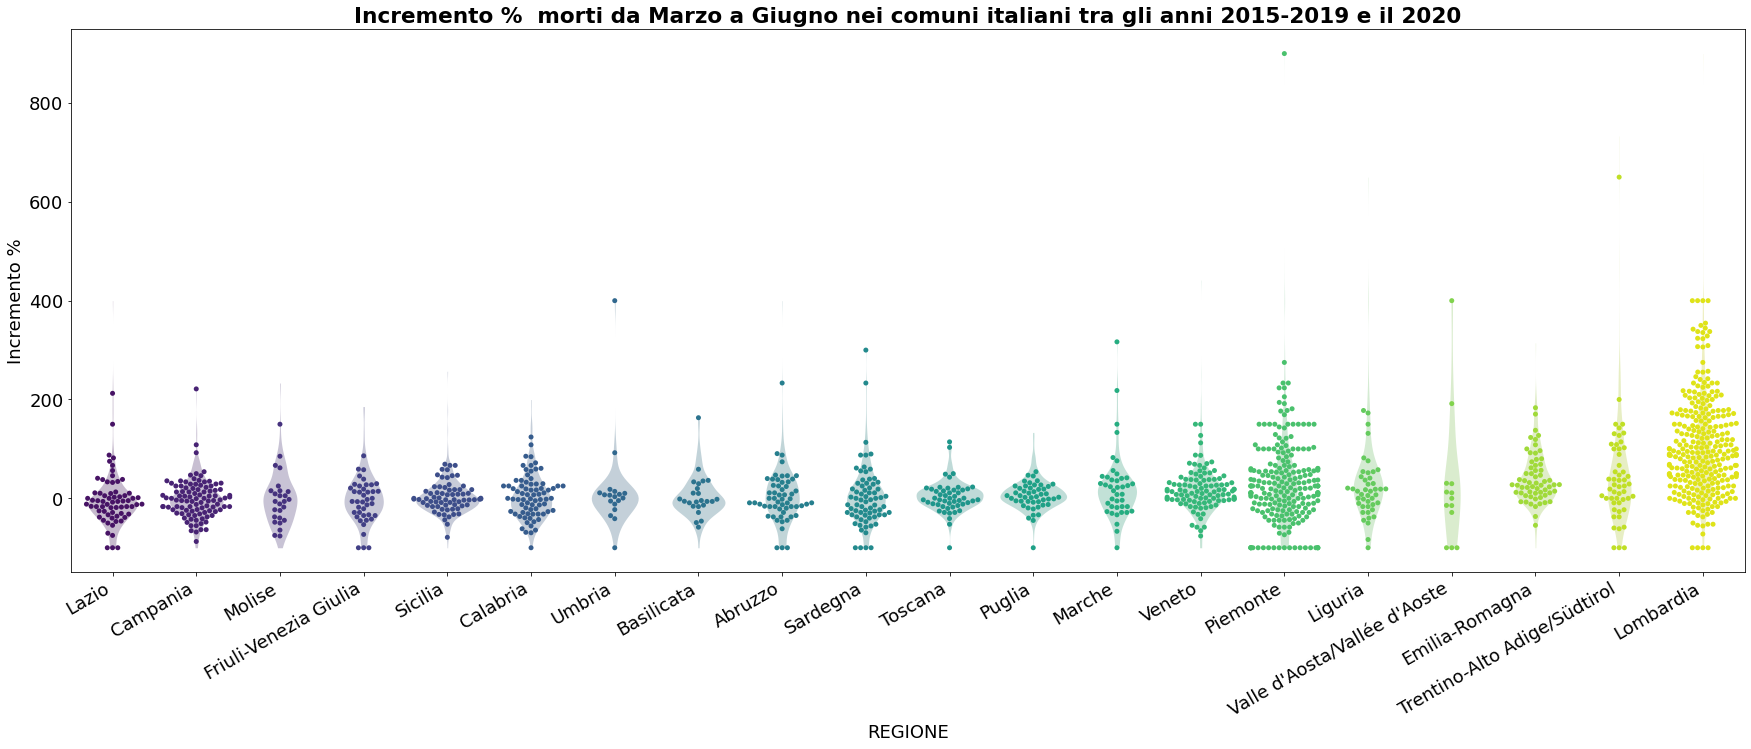

In [1895]:
plt.figure(figsize=[30,10])

D = calcola_incrementi_percentuali(DATA).reorder_levels(axis=1, order=[1,0,2]).sort_index(axis=1, level=[0,1], sort_remaining=False).loc[:,('Incrementi %','TOTALI (Mar-Giu)','totale')]
order=D.groupby('REGIONE').mean().sort_values().index

ax = sns.violinplot(data=D.reset_index(), x='REGIONE', y=('Incrementi %','TOTALI (Mar-Giu)','totale'), order=order, palette='viridis', cut=0, linewidth=0)
plt.setp(ax.collections, alpha=.3)
ax = sns.swarmplot(data=D.reset_index().iloc[::5,:], x='REGIONE', y=('Incrementi %','TOTALI (Mar-Giu)','totale'), order=order, ax=ax, palette='viridis') #prendo una selezione di 1/5 dei comuni per non affollare troppo il grafico
ax.set_title('Incremento %  morti da Marzo a Giugno nei comuni italiani tra gli anni 2015-2019 e il 2020', fontweight='bold')
ax.set_ylabel('Incremento %')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, ha='right');

Il grafico mostra l'incremento percentuale tra la media 2015-2019 e il 2020 del numero di morti totali nel periodo Marzo-Giugno nei comuni italiani (suddivisi per regione di appartenenza).

***
### Suddivisi per provincia (data una Regione)

Suddividendo ulteriormente i dati per provincia si ottiene una visione locale dell'andamento dell'epidemia.

In [1460]:
REGIONE = 'Lombardia'

In [1461]:
DATA_PROV = DATA.groupby(['REGIONE','PROVINCIA']).sum()

INCR_PROV = calcola_incrementi_percentuali(DATA_PROV).droplevel(level=1,axis=1)
INCR_PROV.sort_values(by=('TOTALI (Mar-Giu)', 'totale'), ascending=False).loc[(REGIONE,slice(None)),:]

FOGLIO EXCEL                      MESI                                       \
                                   Gen    Feb     Mar     Apr    Mag    Giu   
REGIONE   PROVINCIA                                                           
Lombardia Bergamo                -8.39  -3.51  575.47  126.31  -0.05  -3.01   
          Cremona               -11.01   0.82  403.16  162.92  10.26   3.53   
          Lodi                  -17.55  15.42  375.84   83.37  14.48  -0.48   
          Brescia               -14.73  -1.64  293.58  141.90   9.12  -3.00   
          Lecco                 -13.97   5.64  185.71  128.73  22.35  10.02   
          Pavia                 -10.63   4.44  139.49  139.70  16.26   6.35   
          Mantova               -10.51  -4.28  123.85  100.62  10.30  -6.27   
          Monza e della Brianza  -9.24   4.43  101.75  106.32  15.50  -5.31   
          Milano                 -9.77   0.45  100.58  108.65  10.80  -4.98   
          Sondrio               -10.76   5.96   78.10   97.37   2.63   6.15   
          Como                  -11.22   4.17   66.67   85.15  10.49   2.02   
          Varese                -14.87  -2.46   34.79   73.13  12.00  -0.50   

FOGLIO EXCEL                            OVER 65 (Mar-Giu)                  \
                                 totale             65-74   75-84  85 e +   
REGIONE   PROVINCIA                                                         
Lombardia Bergamo                114.76            226.60  221.64  173.58   
          Cremona                 95.58            155.36  174.68  165.59   
          Lodi                    78.97            182.03  145.97  110.51   
          Brescia                 70.42            131.44  144.78  112.56   
          Lecco                   54.28             85.65  104.76   93.05   
          Pavia                   47.39            103.83   74.63   85.01   
          Mantova                 34.48             48.84   73.03   63.50   
          Monza e della Brianza   33.71             43.73   49.08   72.24   
          Milano                  32.74             40.25   51.52   72.85   
          Sondrio                 29.08             45.36   51.26   50.80   
          Como                    25.02             27.80   42.71   47.67   
          Varese                  15.31             24.08   24.22   40.30   

FOGLIO EXCEL                            OVER 65 (Mar-Giu) M                  \
                                 totale               65-74   75-84  85 e +   
REGIONE   PROVINCIA                                                           
Lombardia Bergamo                199.09              270.62  263.52  209.92   
          Cremona                167.12              178.07  200.57  182.27   
          Lodi                   134.72              223.71  187.66  124.90   
          Brescia                126.09              148.63  164.04  116.71   
          Lecco                   95.80              113.08  121.01   97.06   
          Pavia                   84.12              121.44   82.81   80.75   
          Mantova                 64.47               44.85   84.96   64.54   
          Monza e della Brianza   59.42               41.80   55.12   68.08   
          Milano                  60.44               49.31   54.86   71.84   
          Sondrio                 50.05               36.64   57.70   37.20   
          Como                    42.92               39.29   42.45   53.46   
          Varese                  32.50               28.07   23.89   41.36   

FOGLIO EXCEL                            OVER 65 (Mar-Giu) F                  \
                                 totale               65-74   75-84  85 e +   
REGIONE   PROVINCIA                                                           
Lombardia Bergamo                245.83              151.15  173.22  155.09   
          Cremona                188.82              116.26  145.78  157.85   
          Lodi                   173.62              111.34   99.10  103.42  

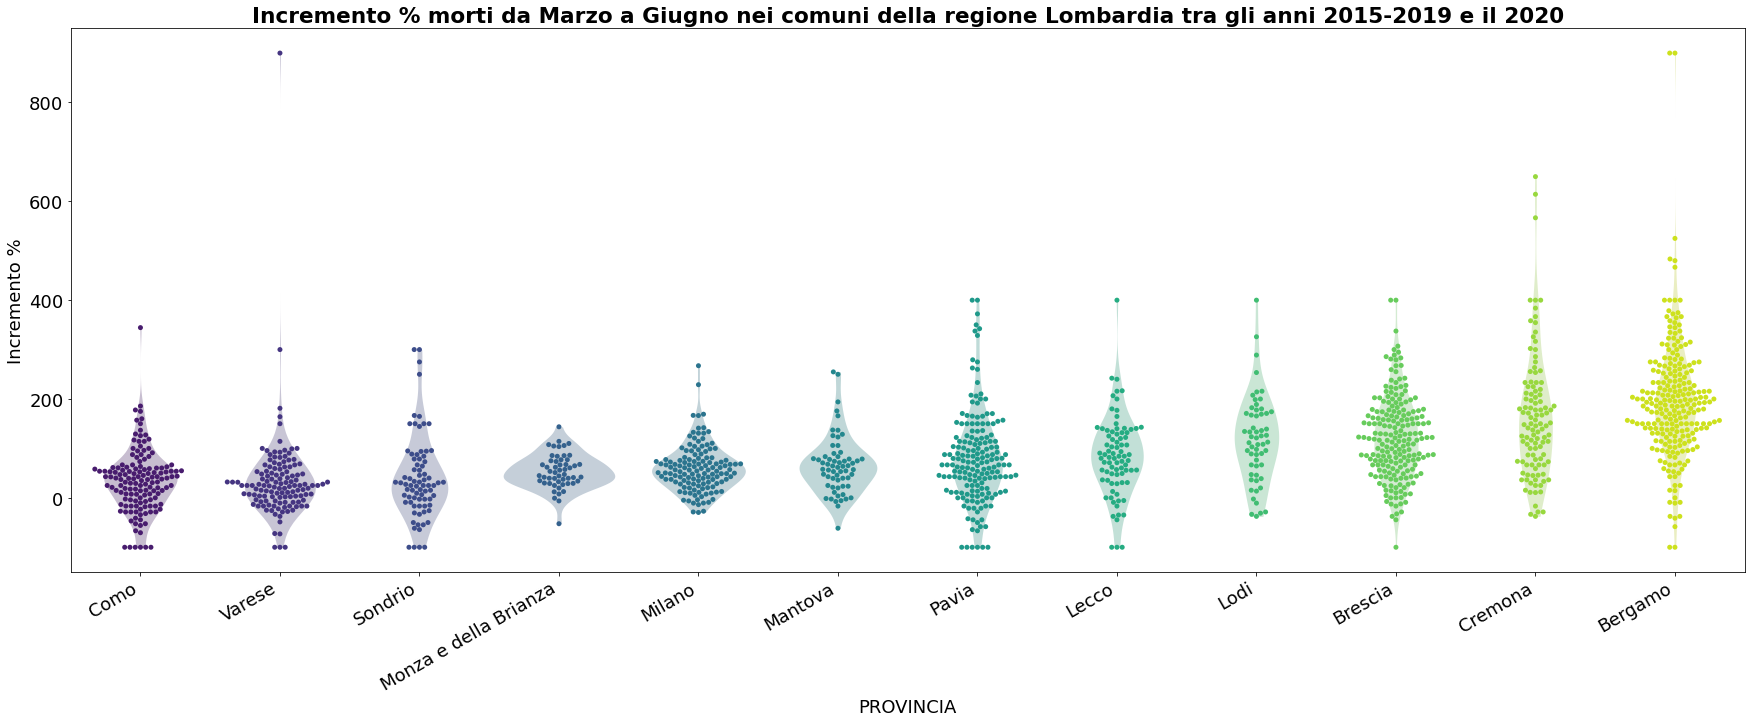

In [1721]:
plt.figure(figsize=[30,10])

D = calcola_incrementi_percentuali(DATA).reorder_levels(axis=1, order=[1,0,2]).sort_index(axis=1, level=[0,1], sort_remaining=False).loc[REGIONE,('Incrementi %','TOTALI (Mar-Giu)','totale')]
order=D.groupby('PROVINCIA').mean().sort_values().index

ax = sns.violinplot(data=D.reset_index(), x='PROVINCIA', y=('Incrementi %','TOTALI (Mar-Giu)','totale'), order=order, palette='viridis', cut=0, linewidth=0)
plt.setp(ax.collections, alpha=.3)
ax = sns.swarmplot(data=D.reset_index(), x='PROVINCIA', y=('Incrementi %','TOTALI (Mar-Giu)','totale'), order=order, ax=ax, palette='viridis')
ax.set_title('Incremento % morti da Marzo a Giugno nei comuni della regione ' + REGIONE + ' tra gli anni 2015-2019 e il 2020', fontweight='bold')
ax.set_ylabel('Incremento %')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, ha='right');

Il grafico mostra l'incremento percentuale tra la media 2015-2019 e il 2020 del numero di morti totali nel periodo Marzo-Giugno nei comuni della regione selezionata (divisi per provincia)

***
### Suddivisi per Comune
L'incremento percentuale di decessi, nei comuni piccoli, è un rapporto tra numeri piccoli, ed è pertanto fortemente influenzato da fluttuazioni statistiche (in particolare da fluttuazioni al denominatore, il numero di morti nella media 2015-2019).\
Nonostante questo fatto, questa visione dei dati evidenzia i focolai principali dell'epidemia, che hanno visto un numero di decessi tra Marzo e Giugno 2020 decuplicato rispetto alla media 2015-2019.

Il dato dell'incremento relativo al mese di Marzo mostra l'effetto dell'epidemia all'apice della prima ondata nei comuni più colpiti: il numero di decessi è stato nel 2020 fino a 20 volte il numero relativo ai 5 anni precedenti.

In [1449]:
INCR = calcola_incrementi_percentuali(DATA).droplevel(level=1,axis=1)
INCR.sort_values(by=('MESI', 'Mar'), ascending=False).dropna()

FOGLIO EXCEL                                                        MESI  \
                                                                     Gen   
REGIONE                      PROVINCIA     COMUNE                          
Lombardia                    Brescia       Zone                  -100.00   
Trentino-Alto Adige/Südtirol Bolzano/Bozen Selva di Val Gardena    87.50   
Lombardia                    Bergamo       Pedrengo                25.00   
                                           San Giovanni Bianco    -61.54   
                             Mantova       Ponti sul Mincio       -37.50   
...                                                                  ...   
Piemonte                     Alessandria   Prasco                -100.00   
                                           Ticineto               150.00   
                                           Paderna                150.00   
Toscana                      Siena         Murlo                   36.36   
Calabria                     Vibo Valentia San Gregorio d'Ippona  -72.22   

FOGLIO EXCEL                                                              \
                                                                     Feb   
REGIONE                      PROVINCIA     COMUNE                          
Lombardia                    Brescia       Zone                  -100.00   
Trentino-Alto Adige/Südtirol Bolzano/Bozen Selva di Val Gardena   -54.55   
Lombardia                    Bergamo       Pedrengo                 8.70   
                                           San Giovanni Bianco     -3.85   
                             Mantova       Ponti sul Mincio      -100.00   
...                                                                  ...   
Piemonte                     Alessandria   Prasco                  66.67   
                                           Ticineto                11.11   
                                           Paderna               -100.00   
Toscana                      Siena         Murlo                    7.14   
Calabria                     Vibo Valentia San Gregorio d'Ippona  127.27   

FOGLIO EXCEL                                                               \
                                                                      Mar   
REGIONE                      PROVINCIA     COMUNE                           
Lombardia                    Brescia       Zone                   1900.00   
Trentino-Alto Adige/Südtirol Bolzano/Bozen Selva di Val Gardena   1700.00   
Lombardia                    Bergamo       Pedrengo               1566.67   
                                           San Giovanni Bianco    1400.00   
                             Mantova       Ponti sul Mincio       1400.00   
...                                                                   ...   
Piemonte                     Alessandria   Prasco                 -100.00   
                                           Ticineto               -100.00   
                                           Paderna                -100.00   
Toscana                      Siena         Murlo                  -100.00   
Calabria                     Vibo Valentia San Gregorio d'Ippona  -100.00   

FOGLIO EXCEL                                                              \
                                                                     Apr   
REGIONE                      PROVINCIA     COMUNE                          
Lombardia                    Brescia       Zone                    42.86   
Trentino-Alto Adige/Südtirol Bolzano/Bozen Selva di Val Gardena   -16.67   
Lombardia                    Bergamo       Pedrengo               221.43   
                                           San Giovanni Bianco     66.67   
                             Mantova       Ponti sul Mincio       -44.44   
...                                                                  ...   
Piemonte                     Alessandria   Prasco                 257.14   
                               

***
# Calcolo Mortalità relativa
Un dato interessante da studiare, e di cui studiare la variazione nel 2020 è il rapporto tra il numero di decessi e il il totale della popolazione in ciascun comune.

In [1906]:
DATA

FOGLIO EXCEL                 MESI                                             \
ANNI                         2020                            MEDIA 2015-2019   
                              Gen Feb Mar Apr Mag Giu totale             Gen   
REGIONE PROVINCIA COMUNE                                                       
Abruzzo Chieti    Altino        3   0   5   1   5   3     17             3.4   
                  Archi         4   7   3   1   5   1     21             4.4   
                  Arielli       2   2   1   2   1   1      9             1.2   
                  Atessa       12  11  14  11  11  13     72            13.4   
                  Bomba         2   2   1   0   1   0      6             0.8   
...                           ...  ..  ..  ..  ..  ..    ...             ...   
Veneto  Vicenza   Villaverla    5   6   6   5   7   2     31             5.4   
                  Zanè          6   5   6   8   3   4     32             5.6   
                  Zermeghedo    0   0   1   1   2   0      4             1.6   
                  Zovencedo     1   1   0   1   2   1      6             1.4   
                  Zugliano      6   6  10   2   5   2     31             3.2   

FOGLIO EXCEL                                                      \
ANNI                                                               
                               Feb   Mar   Apr   Mag  Giu totale   
REGIONE PROVINCIA COMUNE                                           
Abruzzo Chieti    Altino       2.2   2.6   2.8   1.2  3.0   15.2   
                  Archi        2.0   3.2   3.8   2.0  2.8   18.2   
                  Arielli      0.4   1.0   1.0   1.2  1.6    6.4   
                  Atessa      10.0  12.0  11.8  11.0  8.4   66.6   
                  Bomba        1.8   1.4   1.0   0.4  0.8    6.2   
...                            ...   ...   ...   ...  ...    ...   
Veneto  Vicenza   Villaverla   3.4   2.4   4.2   4.0  3.2   22.6   
                  Zanè         5.8   3.0   3.0   3.2  3.4   24.0   
                  Zermeghedo   0.8   0.2   0.8   0.6  1.0    5.0   
                  Zovencedo    0.4   1.2   0.8   0.2  0.6    4.6   
                  Zugliano     4.4   3.6   3.0   3.8  2.2   20.2   

FOGLIO EXCEL                 OVER 65 (Mar-Giu)                      \
ANNI                                      2020                       
                                         65-74 75-84 85 e + totale   
REGIONE PROVINCIA COMUNE                                             
Abruzzo Chieti    Altino                     3     5      5     13   
                  Archi                      1     2      7     10   
                  Arielli                    0     3      2      5   
                  Atessa                     5    18     25     48   
                  Bomba                      0     1      1      2   
...                                        ...   ...    ...    ...   
Veneto  Vicenza   Villaverla                 1     9      9     19   
                  Zanè                       4     3     11     18   
                  Zermeghedo                 0     0      4      4   
                  Zovencedo                  1     2      0      3   
                  Zugliano                   2     8      7     17   

FOGLIO EXCEL                                                      \
ANNI                         MEDIA 2015-2019                       
                                       65-74 75-84 85 e + totale   
REGIONE PROVINCIA COMUNE                                           
Abruzzo Chieti    Altino                 1.2   1.8    5.4    8.4   
                  Archi                  1.4   3.2    6.2   10.8   
                  Arielli                0.0   1.8    2.8    4.6   
                  Atessa                 6.0  13.8   20.2   40.0   
                  Bomba                  0.2   1.8    1.2    3.2   
...                                      ...   ...    ...    ...   
Veneto  Vicenza   Villaverla             1.8   

In [1912]:
DATA.loc[:,('TOTALI (Mar-Giu)', slice(None), 'M')]

FOGLIO EXCEL                 TOTALI (Mar-Giu)                
ANNI                                     2020 MEDIA 2015-2019
                                            M               M
REGIONE PROVINCIA COMUNE                                     
Abruzzo Chieti    Altino                    8             4.8
                  Archi                     3             5.8
                  Arielli                   3             2.0
                  Atessa                   25            22.2
                  Bomba                     0             1.8
...                                       ...             ...
Veneto  Vicenza   Villaverla               10             7.6
                  Zanè                     12             7.4
                  Zermeghedo                1             1.4
                  Zovencedo                 3             1.8
                  Zugliano                 13             5.6

[7357 rows x 2 columns]

In [1944]:
def calcola_Decessi_Rel(DATA, POP_COMUNI):
    if False in (DATA.index == POP_COMUNI.index):
        raise ValueError('Indici Diversi')
    else:
        DATA_rel = DATA.copy(deep=True)
        for col in DATA[['MESI','OVER 65 (Mar-Giu)']]:
            DATA_rel.loc[:,col] = DATA.loc[:,col] / POP_COMUNI['totale']
        for col in DATA[['OVER 65 (Mar-Giu) M']]:
            DATA_rel.loc[:,col] = DATA.loc[:,col] / POP_COMUNI['maschi']
        for col in DATA[['OVER 65 (Mar-Giu) F']]:
            DATA_rel.loc[:,col] = DATA.loc[:,col] / POP_COMUNI['femmine']
        for col in DATA.loc[:,(slice(None), slice(None), 'M')]:
            DATA_rel.loc[:,col] = DATA.loc[:,col] / POP_COMUNI['maschi']
        for col in DATA.loc[:,(slice(None), slice(None), 'F')]:
            DATA_rel.loc[:,col] = DATA.loc[:,col] / POP_COMUNI['femmine']
        for col in DATA.loc[:,('TOTALI (Mar-Giu)', slice(None), 'totale')]:
            DATA_rel.loc[:,col] = DATA.loc[:,col] / POP_COMUNI['totale']

        return DATA_rel

In [1989]:
DATA_REL = calcola_Decessi_Rel(DATA, POP_COMUNI)

In [1990]:
DATA_REL

FOGLIO EXCEL                      MESI                                \
ANNI                              2020                                 
                                   Gen       Feb       Mar       Apr   
REGIONE PROVINCIA COMUNE                                               
Abruzzo Chieti    Altino      0.000968  0.000000  0.001613  0.000323   
                  Archi       0.001901  0.003327  0.001426  0.000475   
                  Arielli     0.001800  0.001800  0.000900  0.001800   
                  Atessa      0.001134  0.001039  0.001323  0.001039   
                  Bomba       0.002653  0.002653  0.001326  0.000000   
...                                ...       ...       ...       ...   
Veneto  Vicenza   Villaverla  0.000816  0.000980  0.000980  0.000816   
                  Zanè        0.000906  0.000755  0.000906  0.001208   
                  Zermeghedo  0.000000  0.000000  0.000734  0.000734   
                  Zovencedo   0.001299  0.001299  0.000000  0.001299   
                  Zugliano    0.000886  0.000886  0.001476  0.000295   

FOGLIO EXCEL                                                                \
ANNI                                                       MEDIA 2015-2019   
                                   Mag       Giu    totale             Gen   
REGIONE PROVINCIA COMUNE                                                     
Abruzzo Chieti    Altino      0.001613  0.000968  0.005484        0.001097   
                  Archi       0.002376  0.000475  0.009981        0.002091   
                  Arielli     0.000900  0.000900  0.008101        0.001080   
                  Atessa      0.001039  0.001228  0.006803        0.001266   
                  Bomba       0.001326  0.000000  0.007958        0.001061   
...                                ...       ...       ...             ...   
Veneto  Vicenza   Villaverla  0.001143  0.000327  0.005062        0.000882   
                  Zanè        0.000453  0.000604  0.004834        0.000846   
                  Zermeghedo  0.001467  0.000000  0.002935        0.001174   
                  Zovencedo   0.002597  0.001299  0.007792        0.001818   
                  Zugliano    0.000738  0.000295  0.004576        0.000472   

FOGLIO EXCEL                                                          \
ANNI                                                                   
                                   Feb       Mar       Apr       Mag   
REGIONE PROVINCIA COMUNE                                               
Abruzzo Chieti    Altino      0.000710  0.000839  0.000903  0.000387   
                  Archi       0.000951  0.001521  0.001806  0.000951   
                  Arielli     0.000360  0.000900  0.000900  0.001080   
                  Atessa      0.000945  0.001134  0.001115  0.001039   
                  Bomba       0.002387  0.001857  0.001326  0.000531   
...                                ...       ...       ...       ...   
Veneto  Vicenza   Villaverla  0.000555  0.000392  0.000686  0.000653   
                  Zanè        0.000876  0.000453  0.000453  0.000483   
                  Zermeghedo  0.000587  0.000147  0.000587  0.000440   
                  Zovencedo   0.000519  0.001558  0.001039  0.000260   
                  Zugliano    0.000650  0.000531  0.000443  0.000561   

FOGLIO EXCEL                                     OVER 65 (Mar-Giu)            \
ANNI                                                          2020             
                                   Giu    totale             65-74     75-84   
REGIONE PROVINCIA COMUNE                                                       
Abruzzo Chieti    Altino      0.000968  0.004903          0.000968  0.001613   
                  Archi       0.001331  0.008650          0.000475  0.000951   
                  Arielli     0.001440  0.005761          0.000000  0.002700   
                  Atessa      0.000794  0.006293          0.000472  0.001701   
                  Bomba    

In [1991]:
pd.DataFrame(DATA_REL.loc[:,('TOTALI (Mar-Giu)','2020','totale')]).idxmax()

TOTALI (Mar-Giu)  2020  totale    (Lombardia, Pavia, Galliavola)
dtype: object

In [1992]:
pd.DataFrame(DATA_REL.loc[('Lombardia', 'Pavia', 'Galliavola'),:]).T

FOGLIO EXCEL               MESI                                         \
ANNI                       2020                                          
                            Gen         Feb        Mar         Apr Mag   
Lombardia Pavia Galliavola    0  0.00520833  0.0364583  0.00520833   0   

FOGLIO EXCEL                                                                   \
ANNI                                              MEDIA 2015-2019               
                                   Giu     totale             Gen         Feb   
Lombardia Pavia Galliavola  0.00520833  0.0520833      0.00416667  0.00416667   

FOGLIO EXCEL                                                              \
ANNI                                                                       
                                 Mar         Apr         Mag         Giu   
Lombardia Pavia Galliavola  0.003125  0.00208333  0.00104167  0.00416667   

FOGLIO EXCEL                        OVER 65 (Mar-Giu)                       \
ANNI                                             2020                        
                             totale             65-74     75-84     85 e +   
Lombardia Pavia Galliavola  0.01875        0.00520833  0.015625  0.0260417   

FOGLIO EXCEL                                                             \
ANNI                                 MEDIA 2015-2019                      
                              totale           65-74     75-84   85 e +   
Lombardia Pavia Galliavola  0.046875      0.00104167  0.003125  0.00625   

FOGLIO EXCEL                          OVER 65 (Mar-Giu) F             \
ANNI                                                 2020              
                               totale               65-74      75-84   
Lombardia Pavia Galliavola  0.0104167                   0  0.0326087   

FOGLIO EXCEL                                                                 \
ANNI                                            MEDIA 2015-2019               
                               85 e +    totale           65-74       75-84   
Lombardia Pavia Galliavola  0.0434783  0.076087      0.00217391  0.00434783   

FOGLIO EXCEL                                     OVER 65 (Mar-Giu) M        \
ANNI                                                            2020         
                               85 e +     totale               65-74 75-84   
Lombardia Pavia Galliavola  0.0108696  0.0173913                0.01     0   

FOGLIO EXCEL                                                                   \
ANNI                                     MEDIA 2015-2019                        
                           85 e + totale           65-74  75-84 85 e + totale   
Lombardia Pavia Galliavola   0.01   0.02               0  0.002  0.002  0.004   

FOGLIO EXCEL               TOTALI (Mar-Giu)                      \
ANNI                                   2020                       
                                          M         F    totale   
Lombardia Pavia Galliavola             0.02  0.076087  0.046875   

FOGLIO EXCEL                                                      \
ANNI                       MEDIA 2015-2019                         
                                         M          F     totale   
Lombardia Pavia Galliavola           0.004  0.0173913  0.0104167   

FOGLIO EXCEL               UNDER 65 (Mar-Giu)                           \
ANNI                                     2020 MEDIA 2015-2019     2020   
                                     totale M        totale M totale F   
Lombardia Pavia Galliavola                  0               0        0   

FOGLIO EXCEL                                                             Zona  
ANNI                       MEDIA 2015-2019   2020 MEDIA 2015-2019              
                                  totale F totale          totale              
Lombardia Pavia Galliavola               0      0               0  Nord-Ovest

In [2003]:
INCR_REL = calcola_incrementi(DATA_REL)

In [2004]:
INCR_REL

FOGLIO EXCEL                       MESI                                \
ANNI                         Incrementi                                 
                                    Gen       Feb       Mar       Apr   
REGIONE PROVINCIA COMUNE                                                
Abruzzo Chieti    Altino      -0.000129 -0.000710  0.000774 -0.000581   
                  Archi       -0.000190  0.002376 -0.000095 -0.001331   
                  Arielli      0.000720  0.001440  0.000000  0.000900   
                  Atessa      -0.000132  0.000094  0.000189 -0.000076   
                  Bomba        0.001592  0.000265 -0.000531 -0.001326   
...                                 ...       ...       ...       ...   
Veneto  Vicenza   Villaverla  -0.000065  0.000425  0.000588  0.000131   
                  Zanè         0.000060 -0.000121  0.000453  0.000755   
                  Zermeghedo  -0.001174 -0.000587  0.000587  0.000147   
                  Zovencedo   -0.000519  0.000779 -0.001558  0.000260   
                  Zugliano     0.000413  0.000236  0.000945 -0.000148   

FOGLIO EXCEL                                               OVER 65 (Mar-Giu)  \
ANNI                                                              Incrementi   
                                   Mag       Giu    totale             65-74   
REGIONE PROVINCIA COMUNE                                                       
Abruzzo Chieti    Altino      0.001226  0.000000  0.000581          0.000581   
                  Archi       0.001426 -0.000856  0.001331         -0.000190   
                  Arielli    -0.000180 -0.000540  0.002340          0.000000   
                  Atessa      0.000000  0.000435  0.000510         -0.000094   
                  Bomba       0.000796 -0.001061 -0.000265         -0.000265   
...                                ...       ...       ...               ...   
Veneto  Vicenza   Villaverla  0.000490 -0.000196  0.001372         -0.000131   
                  Zanè       -0.000030  0.000091  0.001208          0.000332   
                  Zermeghedo  0.001027 -0.000734 -0.000734         -0.000293   
                  Zovencedo   0.002338  0.000519  0.001818          0.001299   
                  Zugliano    0.000177 -0.000030  0.001594          0.000030   

FOGLIO EXCEL                                                \
ANNI                                                         
                                 75-84    85 e +    totale   
REGIONE PROVINCIA COMUNE                                     
Abruzzo Chieti    Altino      0.001032 -0.000129  0.001484   
                  Archi      -0.000570  0.000380 -0.000380   
                  Arielli     0.001080 -0.000720  0.000360   
                  Atessa      0.000397  0.000454  0.000756   
                  Bomba      -0.001061 -0.000265 -0.001592   
...                                ...       ...       ...   
Veneto  Vicenza   Villaverla  0.000653  0.000686  0.001208   
                  Zanè       -0.000151  0.000997  0.001178   
                  Zermeghedo -0.000587  0.002348  0.001467   
                  Zovencedo   0.001039 -0.001039  0.001299   
                  Zugliano    0.000590  0.000354  0.000974   

FOGLIO EXCEL                 OVER 65 (Mar-Giu) M                      \
ANNI                                  Incrementi                       
                                           65-74     75-84    85 e +   
REGIONE PROVINCIA COMUNE                                               
Abruzzo Chieti    Altino                0.000000  0.001192  0.000927   
                  Archi                 0.000197 -0.000592 -0.001579   
                  Arielli               0.000000  0.001880  0.000376   
                  Atessa                0.000000  0.000695  0.000154   
                  Bomba                -0.000531 -0.001592 -0.001592   
...                                          ...       ...       ...   
Veneto  Vicenza   Villaverla            0.000000  0.

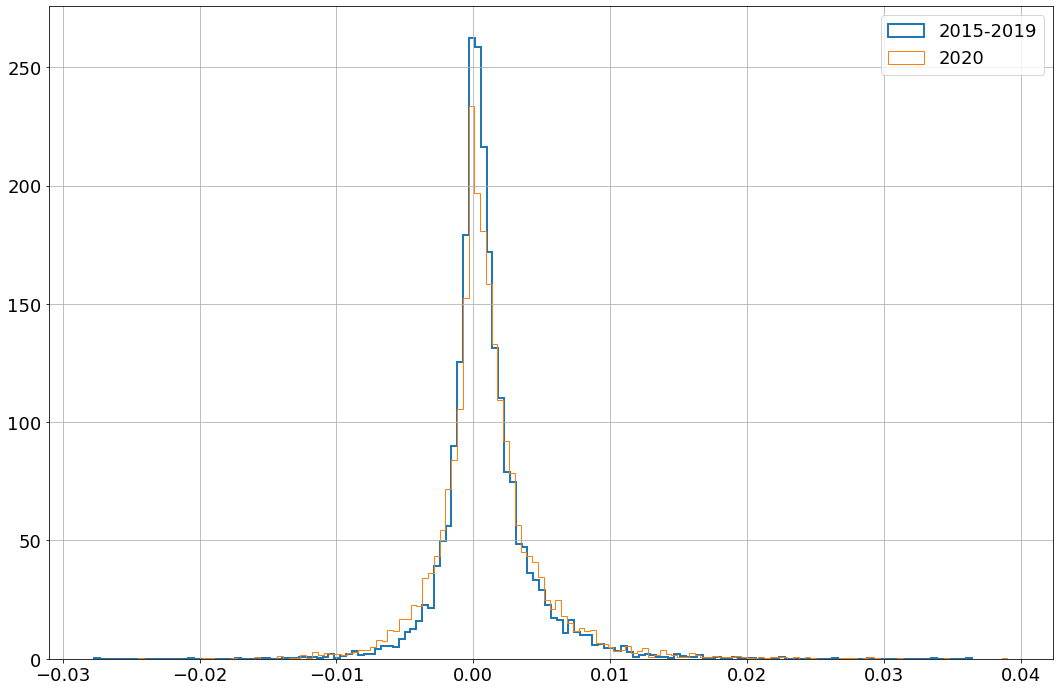

In [2008]:
bins=150
ax = INCR_REL.loc[:,('OVER 65 (Mar-Giu)','Incrementi','totale')].hist(bins=bins,histtype='step', lw=2, density=True, label='2015-2019')
INCR_REL.loc[:,('OVER 65 (Mar-Giu) M','Incrementi','totale')].hist(bins=bins, ax=ax, histtype='step', lw=1, density=True, label='2020')
plt.legend()

In [2012]:
INCR_REL.loc[:,('OVER 65 (Mar-Giu)','Incrementi','totale')].mean()*1000

0.9029762790036874

***
# Grafici

In [1452]:
DATA

FOGLIO EXCEL                 MESI                                             \
ANNI                         2020                            MEDIA 2015-2019   
                              Gen Feb Mar Apr Mag Giu totale             Gen   
REGIONE PROVINCIA COMUNE                                                       
Abruzzo Chieti    Altino        3   0   5   1   5   3     17             3.4   
                  Archi         4   7   3   1   5   1     21             4.4   
                  Arielli       2   2   1   2   1   1      9             1.2   
                  Atessa       12  11  14  11  11  13     72            13.4   
                  Bomba         2   2   1   0   1   0      6             0.8   
...                           ...  ..  ..  ..  ..  ..    ...             ...   
Veneto  Vicenza   Villaverla    5   6   6   5   7   2     31             5.4   
                  Zanè          6   5   6   8   3   4     32             5.6   
                  Zermeghedo    0   0   1   1   2   0      4             1.6   
                  Zovencedo     1   1   0   1   2   1      6             1.4   
                  Zugliano      6   6  10   2   5   2     31             3.2   

FOGLIO EXCEL                                                      \
ANNI                                                               
                               Feb   Mar   Apr   Mag  Giu totale   
REGIONE PROVINCIA COMUNE                                           
Abruzzo Chieti    Altino       2.2   2.6   2.8   1.2  3.0   15.2   
                  Archi        2.0   3.2   3.8   2.0  2.8   18.2   
                  Arielli      0.4   1.0   1.0   1.2  1.6    6.4   
                  Atessa      10.0  12.0  11.8  11.0  8.4   66.6   
                  Bomba        1.8   1.4   1.0   0.4  0.8    6.2   
...                            ...   ...   ...   ...  ...    ...   
Veneto  Vicenza   Villaverla   3.4   2.4   4.2   4.0  3.2   22.6   
                  Zanè         5.8   3.0   3.0   3.2  3.4   24.0   
                  Zermeghedo   0.8   0.2   0.8   0.6  1.0    5.0   
                  Zovencedo    0.4   1.2   0.8   0.2  0.6    4.6   
                  Zugliano     4.4   3.6   3.0   3.8  2.2   20.2   

FOGLIO EXCEL                 OVER 65 (Mar-Giu)                      \
ANNI                                      2020                       
                                         65-74 75-84 85 e + totale   
REGIONE PROVINCIA COMUNE                                             
Abruzzo Chieti    Altino                     3     5      5     13   
                  Archi                      1     2      7     10   
                  Arielli                    0     3      2      5   
                  Atessa                     5    18     25     48   
                  Bomba                      0     1      1      2   
...                                        ...   ...    ...    ...   
Veneto  Vicenza   Villaverla                 1     9      9     19   
                  Zanè                       4     3     11     18   
                  Zermeghedo                 0     0      4      4   
                  Zovencedo                  1     2      0      3   
                  Zugliano                   2     8      7     17   

FOGLIO EXCEL                                                      \
ANNI                         MEDIA 2015-2019                       
                                       65-74 75-84 85 e + totale   
REGIONE PROVINCIA COMUNE                                           
Abruzzo Chieti    Altino                 1.2   1.8    5.4    8.4   
                  Archi                  1.4   3.2    6.2   10.8   
                  Arielli                0.0   1.8    2.8    4.6   
                  Atessa                 6.0  13.8   20.2   40.0   
                  Bomba                  0.2   1.8    1.2    3.2   
...                                      ...   ...    ...    ...   
Veneto  Vicenza   Villaverla             1.8   

***
# Distribuzioni

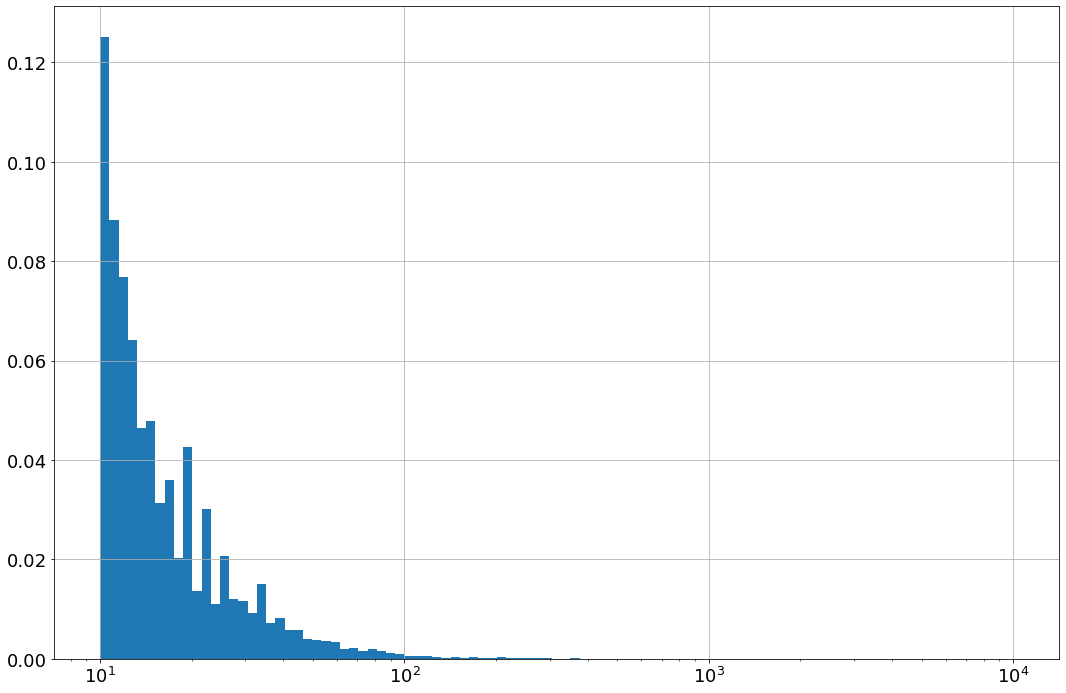

In [972]:
ax = DATA.loc[:,('OVER 65 (Mar-Giu) F','2020','totale')].hist(bins=np.logspace(1,4,100), density=True)
ax.set_xscale('log')

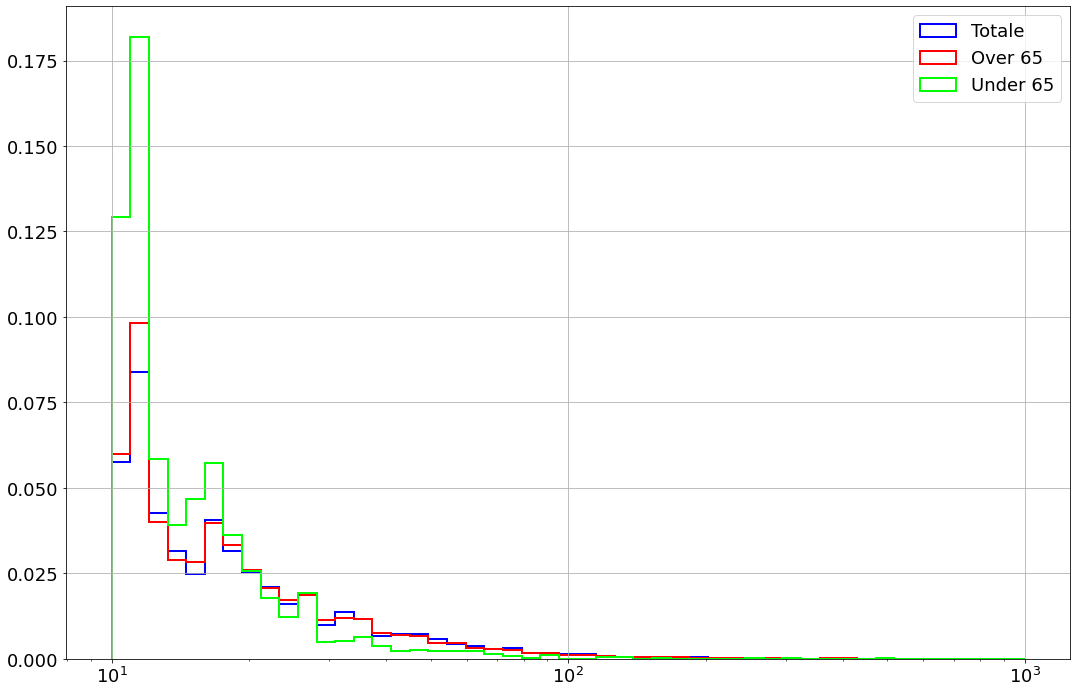

In [985]:
ax = DATA.loc[:,('TOTALI (Mar-Giu)','2020','totale')].hist(bins=np.logspace(1,3,50), density=True, histtype='step',lw=2, label='Totale', color='blue')
DATA.loc[:,('OVER 65 (Mar-Giu)','2020','totale')].hist(bins=np.logspace(1,3,50), density=True, histtype='step', ax=ax,lw=2, label='Over 65', color='red')
DATA.loc[:,('UNDER 65 (Mar-Giu)','2020','totale')].hist(bins=np.logspace(1,3,50), density=True, histtype='step', ax=ax,lw=2, label='Under 65', color='lime')
ax.set_xscale('log')
plt.legend()

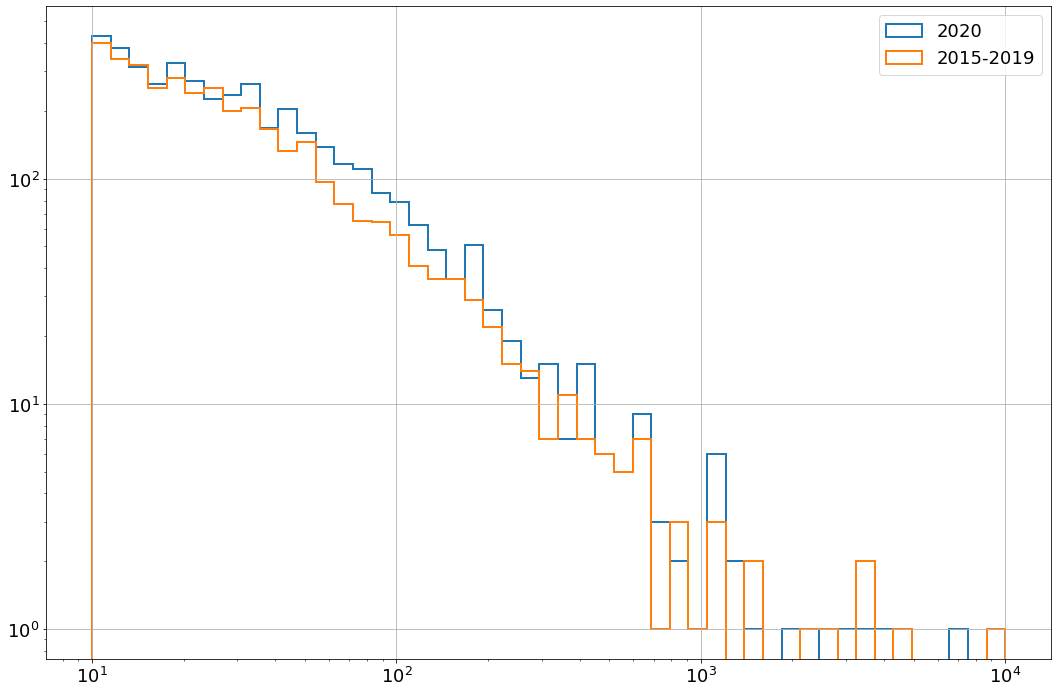

In [1455]:
ax = DATA.loc[:,('TOTALI (Mar-Giu)',slice(None),'totale')].droplevel(level=[0,2], axis=1)['2020'].hist(bins=np.logspace(1,4,50) ,label='2020', histtype='step', lw=2)
DATA.loc[:,('TOTALI (Mar-Giu)',slice(None),'totale')].droplevel(level=[0,2], axis=1)['MEDIA 2015-2019'].hist(bins=np.logspace(1,4,50) ,label='2015-2019',ax=ax, histtype='step', lw=2)
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend()

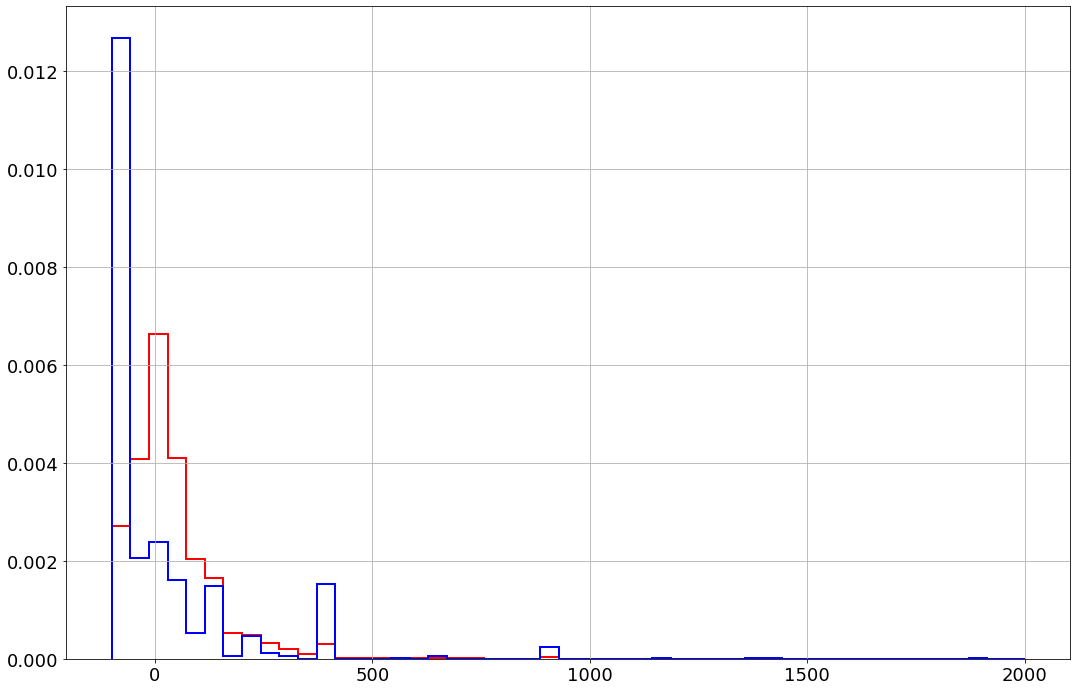

In [931]:
bins=np.linspace(-100,2000,50)
ax = INCR_prov.loc[:,('OVER 65 (Mar-Giu)','85 e +')].hist(bins=bins, density=True, histtype='step', lw=2,  color='red')
ax = INCR_prov.loc[:,('OVER 65 (Mar-Giu)','totale F')].hist(bins=bins, density=True, histtype='step', lw=2, ax=ax, color='blue')
#INCR_prov.loc[:,('TOTALI (Mar-Giu)','totale')].hist(bins=bins, density=True, ax=ax, histtype='step', lw=2, color='lime')
#plt.legend()

In [877]:
DATA.groupby(['REGIONE','PROVINCIA']).sum()

MESI                                                    \
                     2020                                   MEDIA 2015-2019   
                      Gen  Feb   Mar   Apr  Mag  Giu totale             Gen   
REGIONE    PROVINCIA                                                          
Abruzzo    Chieti     412  387   412   388  300  248   2147           434.4   
           L'Aquila   298  277   294   260  230  209   1568           360.6   
           Pescara    327  303   402   356  272  236   1896           369.2   
           Teramo     353  318   375   299  258  243   1846           352.0   
Basilicata Matera     191  188   173   172  155  113    992           192.4   
...                   ...  ...   ...   ...  ...  ...    ...             ...   
Veneto     Rovigo     283  258   338   299  228  242   1648           302.2   
           Treviso    740  700   950   833  651  606   4480           802.4   
           Venezia    877  778   971   891  788  638   4943           917.6   
           Verona     868  764  1035  1019  710  654   5050           895.2   
           Vicenza    779  673   827   816  694  585   4374           826.0   

                                                                 \
                                                                  
                        Feb    Mar    Apr    Mag    Giu  totale   
REGIONE    PROVINCIA                                              
Abruzzo    Chieti     360.2  378.2  334.6  328.4  316.6  2152.4   
           L'Aquila   313.0  297.2  265.2  249.0  245.6  1730.6   
           Pescara    290.8  299.8  267.2  265.8  264.0  1756.8   
           Teramo     304.2  302.8  271.2  269.8  254.2  1754.2   
Basilicata Matera     161.2  183.4  153.4  149.8  147.4   987.6   
...                     ...    ...    ...    ...    ...     ...   
Veneto     Rovigo     277.6  275.0  261.4  239.2  232.0  1587.4   
           Treviso    718.6  716.2  650.2  643.8  590.0  4121.2   
           Venezia    818.8  804.8  699.4  716.2  671.4  4628.2   
           Verona     740.8  755.8  666.6  677.6  640.4  4376.4   
           Vicenza    700.4  692.4  622.2  621.4  595.6  4058.0   

                     OVER 65 (Mar-Giu)                                      \
                                  2020                     MEDIA 2015-2019   
                                 65-74 75-84 85 e + totale           65-74   
REGIONE    PROVINCIA                                                         
Abruzzo    Chieti                  160   356    687   1203           161.6   
           L'Aquila                133   259    514    906           127.0   
           Pescara                 149   345    621   1115           135.6   
           Teramo                  146   343    560   1049           138.0   
Basilicata Matera                   88   169    290    547            80.8   
...                                ...   ...    ...    ...             ...   
Veneto     Rovigo                  123   303    558    984           129.0   
           Treviso                 364   863   1558   2785           321.0   
           Venezia                 409   961   1620   2990           402.8   
           Verona                  397   967   1735   3099           361.4   
           Vicenza                 376   832   1454   2662           341.6   

                                            OVER 65 (Mar-Giu) F               \
                                                           2020                
                      75-84  85 e +  totale               65-74 75-84 85 e +   
REGIONE    PROVINCIA                                                           
Abruzzo    Chieti     411.0   659.2  1231.8                  50   153    434   
           L'Aquila   282.4   537.2   946.6                  58   128    321   
           Pescara    316.0   531.0   982.6                  61   158    379   
           Teramo     334.2   508.6   980.8                  50   145    342   
Basilicata Matera 

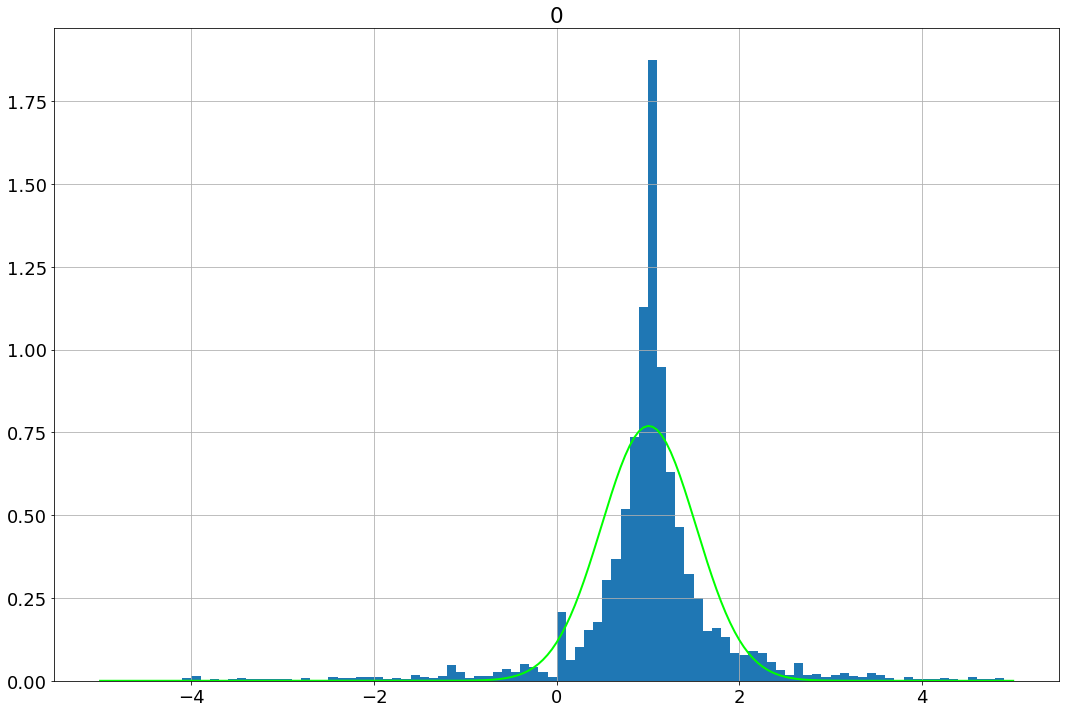

In [794]:
incrDecessi_Over65_su_Tot = (INCR[('OVER 65 (Mar-Giu)','totale')] / INCR[('TOTALI (Mar-Giu)','totale')]).replace([np.inf, -np.inf], np.nan)
u,s = st.norm.fit(incrDecessi_Over65_su_Tot.dropna())
X = np.linspace(-5,5,201)
G = st.norm(u,s-1.3)
pd.DataFrame(incrDecessi_Over65_su_Tot).hist(bins=np.linspace(-5,5,101), density=True)
plt.plot(X,G.pdf(X), lw=2, color='lime')

In [786]:
st.norm.fit(incrDecessi_Over65_su_Tot.replace([np.inf,-np.inf],np.nan).dropna())

(1.0083884799575056, 1.818359092644727)

***
# Test di Significanza Statistica